In [4]:
# ------------------------------
# Cell 1 - Imports & settings
# ------------------------------

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image
# reproducibility (optional)
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
print("Imports OK")


Imports OK


In [3]:
pip install matplotlib tensorflow


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\amitr\AppData\Local\Prog

In [5]:
# ------------------------------
# Cell 2 - Load & preprocess data
# ------------------------------
# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize to 0-1 floats
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

print("x_train:", x_train.shape, "x_test:", x_test.shape)
print("Example label (first 10):", y_train[:10].ravel())


x_train: (50000, 32, 32, 3) x_test: (10000, 32, 32, 3)
Example label (first 10): [6 9 9 4 1 1 2 7 8 3]


In [6]:
# ------------------------------
# Cell 3 - Data augmentation (applied only to training)
# ------------------------------
batch_size = 64

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
# datagen expects inputs already normalized (we normalized above)
datagen.fit(x_train)
print("Data generator ready")


Data generator ready


In [7]:
# ------------------------------
# Cell 4 - Build a deeper CNN model
# ------------------------------
def build_cnn(input_shape=(32,32,3), num_classes=10):
    model = models.Sequential()
    # Block 1
    model.add(layers.Conv2D(32, (3,3), padding='same', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(32, (3,3), padding='same', kernel_initializer='he_uniform'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.25))

    # Block 2
    model.add(layers.Conv2D(64, (3,3), padding='same', kernel_initializer='he_uniform'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(64, (3,3), padding='same', kernel_initializer='he_uniform'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.25))

    # Block 3
    model.add(layers.Conv2D(128, (3,3), padding='same', kernel_initializer='he_uniform'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(128, (3,3), padding='same', kernel_initializer='he_uniform'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.25))

    # Classifier
    model.add(layers.Flatten())
    model.add(layers.Dense(512, kernel_initializer='he_uniform'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

model = build_cnn()
model.summary()


c:\Users\amitr\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 128)      │             

 Total params: 1,345,066 (5.13 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [12]:
# ------------------------------
# Cell 5 - Compile and callbacks
# ------------------------------
lr = 1e-3
model.compile(optimizer=optimizers.Adam(lr),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_path = "cnn_cifar10_best.h5"
callbacks_list = [
    callbacks.ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1),
    callbacks.EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True, verbose=1),
    callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
]
print("Compiled. Callbacks ready.")


Compiled. Callbacks ready.


In [13]:
# ------------------------------
# Cell 6 - Train with augmentation
# ------------------------------
epochs = 50  # EarlyStopping will likely stop earlier

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size, shuffle=True),
    steps_per_epoch = x_train.shape[0] // batch_size,
    epochs = epochs,
    validation_data = (x_test, y_test),
    callbacks = callbacks_list,
    verbose = 2
)


c:\Users\amitr\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50

Epoch 1: val_accuracy improved from None to 0.59440, saving model to cnn_cifar10_best.h5


781/781 - 94s - 120ms/step - accuracy: 0.5583 - loss: 1.2306 - val_accuracy: 0.5944 - val_loss: 1.1446 - learning_rate: 1.0000e-03
Epoch 2/50


c:\Users\amitr\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.59440
781/781 - 3s - 3ms/step - accuracy: 0.6406 - loss: 1.0503 - val_accuracy: 0.5884 - val_loss: 1.1683 - learning_rate: 1.0000e-03
Epoch 3/50

Epoch 3: val_accuracy improved from 0.59440 to 0.68100, saving model to cnn_cifar10_best.h5


781/781 - 55s - 71ms/step - accuracy: 0.6400 - loss: 1.0223 - val_accuracy: 0.6810 - val_loss: 0.8969 - learning_rate: 1.0000e-03
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.68100
781/781 - 3s - 3ms/step - accuracy: 0.6406 - loss: 1.1386 - val_accuracy: 0.6782 - val_loss: 0.9001 - learning_rate: 1.0000e-03
Epoch 5/50

Epoch 5: val_accuracy improved from 0.68100 to 0.71470, saving model to cnn_cifar10_best.h5


781/781 - 55s - 71ms/step - accuracy: 0.6772 - loss: 0.9084 - val_accuracy: 0.7147 - val_loss: 0.8190 - learning_rate: 1.0000e-03
Epoch 6/50

Epoch 6: val_accuracy did not improve from 0.71470
781/781 - 3s - 4ms/step - accuracy: 0.6406 - loss: 0.8092 - val_accuracy: 0.7125 - val_loss: 0.8191 - learning_rate: 1.0000e-03
Epoch 7/50

Epoch 7: val_accuracy improved from 0.71470 to 0.73350, saving model to cnn_cifar10_best.h5


781/781 - 61s - 78ms/step - accuracy: 0.7048 - loss: 0.8383 - val_accuracy: 0.7335 - val_loss: 0.7685 - learning_rate: 1.0000e-03
Epoch 8/50

Epoch 8: val_accuracy did not improve from 0.73350
781/781 - 4s - 5ms/step - accuracy: 0.6719 - loss: 0.8846 - val_accuracy: 0.7329 - val_loss: 0.7748 - learning_rate: 1.0000e-03
Epoch 9/50

Epoch 9: val_accuracy improved from 0.73350 to 0.77130, saving model to cnn_cifar10_best.h5


781/781 - 76s - 98ms/step - accuracy: 0.7234 - loss: 0.7877 - val_accuracy: 0.7713 - val_loss: 0.6480 - learning_rate: 1.0000e-03
Epoch 10/50

Epoch 10: val_accuracy improved from 0.77130 to 0.77180, saving model to cnn_cifar10_best.h5


781/781 - 4s - 5ms/step - accuracy: 0.8438 - loss: 0.5527 - val_accuracy: 0.7718 - val_loss: 0.6468 - learning_rate: 1.0000e-03
Epoch 11/50

Epoch 11: val_accuracy did not improve from 0.77180
781/781 - 76s - 98ms/step - accuracy: 0.7398 - loss: 0.7481 - val_accuracy: 0.7292 - val_loss: 0.8084 - learning_rate: 1.0000e-03
Epoch 12/50

Epoch 12: val_accuracy did not improve from 0.77180
781/781 - 4s - 6ms/step - accuracy: 0.7656 - loss: 0.5218 - val_accuracy: 0.7302 - val_loss: 0.8072 - learning_rate: 1.0000e-03
Epoch 13/50

Epoch 13: val_accuracy did not improve from 0.77180

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
781/781 - 75s - 96ms/step - accuracy: 0.7493 - loss: 0.7159 - val_accuracy: 0.7228 - val_loss: 0.8353 - learning_rate: 1.0000e-03
Epoch 14/50

Epoch 14: val_accuracy did not improve from 0.77180
781/781 - 4s - 5ms/step - accuracy: 0.7812 - loss: 0.7118 - val_accuracy: 0.7216 - val_loss: 0.8372 - learning_rate: 5.0000e-04
Epoch 15/50

Epoch

781/781 - 67s - 85ms/step - accuracy: 0.7726 - loss: 0.6549 - val_accuracy: 0.7802 - val_loss: 0.6524 - learning_rate: 5.0000e-04
Epoch 16/50

Epoch 16: val_accuracy did not improve from 0.78020

Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
781/781 - 3s - 4ms/step - accuracy: 0.8125 - loss: 0.6147 - val_accuracy: 0.7778 - val_loss: 0.6565 - learning_rate: 5.0000e-04
Epoch 17/50

Epoch 17: val_accuracy improved from 0.78020 to 0.80080, saving model to cnn_cifar10_best.h5


781/781 - 66s - 84ms/step - accuracy: 0.7858 - loss: 0.6103 - val_accuracy: 0.8008 - val_loss: 0.5862 - learning_rate: 2.5000e-04
Epoch 18/50

Epoch 18: val_accuracy improved from 0.80080 to 0.80120, saving model to cnn_cifar10_best.h5


781/781 - 3s - 4ms/step - accuracy: 0.7969 - loss: 0.6499 - val_accuracy: 0.8012 - val_loss: 0.5861 - learning_rate: 2.5000e-04
Epoch 19/50

Epoch 19: val_accuracy improved from 0.80120 to 0.81500, saving model to cnn_cifar10_best.h5


781/781 - 66s - 85ms/step - accuracy: 0.7962 - loss: 0.5888 - val_accuracy: 0.8150 - val_loss: 0.5431 - learning_rate: 2.5000e-04
Epoch 20/50

Epoch 20: val_accuracy improved from 0.81500 to 0.81540, saving model to cnn_cifar10_best.h5


781/781 - 3s - 4ms/step - accuracy: 0.8125 - loss: 0.5474 - val_accuracy: 0.8154 - val_loss: 0.5433 - learning_rate: 2.5000e-04
Epoch 21/50

Epoch 21: val_accuracy did not improve from 0.81540
781/781 - 67s - 85ms/step - accuracy: 0.7986 - loss: 0.5819 - val_accuracy: 0.8020 - val_loss: 0.5905 - learning_rate: 2.5000e-04
Epoch 22/50

Epoch 22: val_accuracy did not improve from 0.81540

Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
781/781 - 3s - 4ms/step - accuracy: 0.7969 - loss: 0.5946 - val_accuracy: 0.8014 - val_loss: 0.5909 - learning_rate: 2.5000e-04
Epoch 23/50

Epoch 23: val_accuracy improved from 0.81540 to 0.82130, saving model to cnn_cifar10_best.h5


781/781 - 66s - 85ms/step - accuracy: 0.8030 - loss: 0.5676 - val_accuracy: 0.8213 - val_loss: 0.5249 - learning_rate: 1.2500e-04
Epoch 24/50

Epoch 24: val_accuracy did not improve from 0.82130
781/781 - 3s - 4ms/step - accuracy: 0.7656 - loss: 0.6791 - val_accuracy: 0.8209 - val_loss: 0.5254 - learning_rate: 1.2500e-04
Epoch 25/50

Epoch 25: val_accuracy improved from 0.82130 to 0.82370, saving model to cnn_cifar10_best.h5


781/781 - 67s - 85ms/step - accuracy: 0.8053 - loss: 0.5641 - val_accuracy: 0.8237 - val_loss: 0.5184 - learning_rate: 1.2500e-04
Epoch 26/50

Epoch 26: val_accuracy did not improve from 0.82370
781/781 - 3s - 4ms/step - accuracy: 0.8438 - loss: 0.4741 - val_accuracy: 0.8234 - val_loss: 0.5183 - learning_rate: 1.2500e-04
Epoch 27/50

Epoch 27: val_accuracy did not improve from 0.82370
781/781 - 67s - 85ms/step - accuracy: 0.8071 - loss: 0.5546 - val_accuracy: 0.8145 - val_loss: 0.5527 - learning_rate: 1.2500e-04
Epoch 28/50

Epoch 28: val_accuracy did not improve from 0.82370

Epoch 28: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
781/781 - 4s - 5ms/step - accuracy: 0.7188 - loss: 0.7692 - val_accuracy: 0.8153 - val_loss: 0.5520 - learning_rate: 1.2500e-04
Epoch 29/50

Epoch 29: val_accuracy did not improve from 0.82370
781/781 - 66s - 84ms/step - accuracy: 0.8113 - loss: 0.5432 - val_accuracy: 0.8206 - val_loss: 0.5318 - learning_rate: 6.2500e-05
Epoch 30/50

Epoc

781/781 - 67s - 85ms/step - accuracy: 0.8111 - loss: 0.5436 - val_accuracy: 0.8281 - val_loss: 0.5057 - learning_rate: 6.2500e-05
Epoch 32/50

Epoch 32: val_accuracy did not improve from 0.82810
781/781 - 4s - 5ms/step - accuracy: 0.7969 - loss: 0.6244 - val_accuracy: 0.8277 - val_loss: 0.5064 - learning_rate: 6.2500e-05
Epoch 33/50

Epoch 33: val_accuracy improved from 0.82810 to 0.83240, saving model to cnn_cifar10_best.h5


781/781 - 66s - 85ms/step - accuracy: 0.8149 - loss: 0.5342 - val_accuracy: 0.8324 - val_loss: 0.5005 - learning_rate: 6.2500e-05
Epoch 34/50

Epoch 34: val_accuracy did not improve from 0.83240
781/781 - 3s - 4ms/step - accuracy: 0.7656 - loss: 0.6653 - val_accuracy: 0.8322 - val_loss: 0.5009 - learning_rate: 6.2500e-05
Epoch 35/50

Epoch 35: val_accuracy did not improve from 0.83240
781/781 - 67s - 85ms/step - accuracy: 0.8140 - loss: 0.5371 - val_accuracy: 0.8262 - val_loss: 0.5188 - learning_rate: 6.2500e-05
Epoch 36/50

Epoch 36: val_accuracy did not improve from 0.83240

Epoch 36: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
781/781 - 3s - 4ms/step - accuracy: 0.9062 - loss: 0.3596 - val_accuracy: 0.8261 - val_loss: 0.5188 - learning_rate: 6.2500e-05
Epoch 37/50

Epoch 37: val_accuracy improved from 0.83240 to 0.83430, saving model to cnn_cifar10_best.h5


781/781 - 67s - 86ms/step - accuracy: 0.8147 - loss: 0.5318 - val_accuracy: 0.8343 - val_loss: 0.4942 - learning_rate: 3.1250e-05
Epoch 38/50

Epoch 38: val_accuracy improved from 0.83430 to 0.83440, saving model to cnn_cifar10_best.h5


781/781 - 4s - 5ms/step - accuracy: 0.9062 - loss: 0.4138 - val_accuracy: 0.8344 - val_loss: 0.4938 - learning_rate: 3.1250e-05
Epoch 39/50

Epoch 39: val_accuracy did not improve from 0.83440
781/781 - 66s - 84ms/step - accuracy: 0.8178 - loss: 0.5258 - val_accuracy: 0.8283 - val_loss: 0.5110 - learning_rate: 3.1250e-05
Epoch 40/50

Epoch 40: val_accuracy did not improve from 0.83440
781/781 - 3s - 4ms/step - accuracy: 0.7969 - loss: 0.5710 - val_accuracy: 0.8285 - val_loss: 0.5109 - learning_rate: 3.1250e-05
Epoch 41/50

Epoch 41: val_accuracy did not improve from 0.83440

Epoch 41: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
781/781 - 66s - 84ms/step - accuracy: 0.8166 - loss: 0.5302 - val_accuracy: 0.8302 - val_loss: 0.5072 - learning_rate: 3.1250e-05
Epoch 42/50

Epoch 42: val_accuracy did not improve from 0.83440
781/781 - 3s - 4ms/step - accuracy: 0.7969 - loss: 0.5640 - val_accuracy: 0.8301 - val_loss: 0.5070 - learning_rate: 1.5625e-05
Epoch 43/50

Epoc

In [10]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\amitr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


✅ Best model test accuracy: 83.44% (loaded from cnn_cifar10_best.h5)


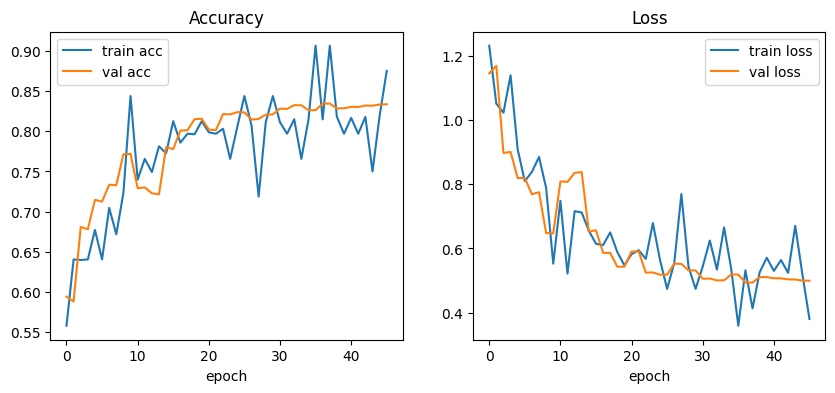

In [14]:
# ------------------------------
# Cell 7 - Evaluate & plots
# ------------------------------
# Load best saved model (if checkpoint saved)
if os.path.exists(checkpoint_path):
    best = load_model(checkpoint_path)
    test_loss, test_acc = best.evaluate(x_test, y_test, verbose=0)
    print(f"✅ Best model test accuracy: {test_acc*100:.2f}% (loaded from {checkpoint_path})")
else:
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"✅ Final model test accuracy: {test_acc*100:.2f}%")

# Plot accuracy & loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend(); plt.title('Accuracy'); plt.xlabel('epoch')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend(); plt.title('Loss'); plt.xlabel('epoch')
plt.show()


In [15]:
# ------------------------------
# Cell 8 - Save final model (optional)
# ------------------------------
final_path = "cnn_cifar10_final.h5"
model.save(final_path)
print(f"Saved model to {final_path}")


Saved model to cnn_cifar10_final.h5


In [ ]:
# # ------------------------------
# # Cell 9 - Load & predict a custom single image
# # ------------------------------
# def predict_custom_image(img_path, model_path="cnn_cifar10_best.h5"):
#     # Load model
#     m = load_model(model_path)
#     # Load image (any size) and resize to 32x32
#     img = image.load_img(img_path, target_size=(32,32))
#     arr = image.img_to_array(img).astype('float32') / 255.0
#     arr = np.expand_dims(arr, axis=0)
#     probs = m.predict(arr)
#     cls = int(np.argmax(probs, axis=1)[0])
#     return class_names[cls], float(np.max(probs))

# # Example usage:
# # predicted_class, confidence = predict_custom_image("myimage.png")
# # print(predicted_class, confidence)


In [ ]:
import os
print(os.getcwd())
